## 순방향 연산

In [23]:
import numpy as np

X = np.array([
    [0,0,1], 
    [0,1,1],
    [1,0,1],
    [1,1,1]
])

In [10]:
# 활성화 함수 sigmoid
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [25]:
# 가중치(지금은 랜덤하게 선택하는 걸로, 원래는 학습이 완료된 가중치를 사용해야함)
# 음수에서부터 양수까지 다양한 값을 가지게 하기 위해 2를 곱하고 1을 빼주었음
W = 2 * np.random.random((1, 3)) -1
W

array([[ 0.96805686,  0.1544521 , -0.82880795]])

In [26]:
X[0, :] , X[0, :].T 

(array([0, 0, 1]), array([0, 0, 1]))

In [27]:
X[0, :].shape , X[0, :].T.shape

((3,), (3,))

In [28]:
# 추론(순방향 연산)
N = 4

for k in range(N):
    x = X[k, :].T 
    v = np.matmul(W, x)
    y = sigmoid(v)

    print(y)

[0.30389718]
[0.33752218]
[0.53475609]
[0.57290196]


이렇듯 순방향 연산은 데이터에 가중치와 편향을 주고 활성화함수를 거쳐 출력값을 얻는 흐름을 말한다.

위에서는 가중치를 랜덤하게 설정했는데 실제로는 학습된 가중치를 주어야한다.
학습을 시키기 위해 정답지를 주고 학습된 가중치를 얻어보자.

In [8]:
# 정답지
D = np.array([
    [0], [0], [1], [1]
])

가중치를 어떻게 학습시킬 수 있을까?

우리는 이제 정답지를 알고 있으므로 출력값과 정답지와의 오차를 구해 그 오차가 작아지도록 하는 가중치를 구하면 된다.

In [8]:
# 출력값 계산
def calc_output(W, x):
    v = np.matmul(W, x)
    y = sigmoid(v)
    return y

# 오차 계산
def calc_error(d, y_pred):
    e = d - y_pred
    delta = y_pred * (1 - y_pred) * e
    return delta

오차를 계산하는 calc_error 함수에서 정답지와 출력값의 차이인 e는 알겠는데 delta는 무엇일까?

In [13]:
# 시그모이드 함수의 미분 형태
import sympy as sym

z = sym.Symbol('z')
s = 1 / (1 + sym.exp(-z)) # 시그모이드 함수 형태
sym.diff(s) # 시그모이드 함수 미분 형태

exp(-z)/(1 + exp(-z))**2

시그모이드 함수의 미분 형태를 조금 변형시키면 s * (1 - s) 의 형태가 나온다. 

즉 delta의  y_pred * (1 - y_pred) * e 중 y_pred * (1 - y_pred)는 e의 미분값임을 알 수 있다.
오차를 뒤로 뒤로 전해줄 때 단순히 차이만 계산하는 것이 아닌 미분값을 같이 곱해서 넘겨주는 것이다.

In [4]:
# 한 epoch에 수행되는 W 계산(gradient descent)
def delta_GD(W, X, D, alpha):
    # 모든 데이터에 대해 계산하는 gradient descent 방식에 따라
    # 전체 데이터 개수인 4개를 다 거쳐야함
    for k in range(4):
        x = X[k, :].T # 입력값
        d = D[k] # 실제값(정답지)

        y_pred = calc_output(W, x) # 순방향 추론
        delta = calc_error(d , y_pred) # delta 계산

        dW = alpha * delta * x # 가중치 변화량
        W = W + dW # 가중치 업데이트
    return W

In [18]:
W

array([[ 0.77502219, -0.11548979,  0.39028926]])

In [19]:
# 기존 가중치를 학습을 통해 업데이트 시켜보자
alpha = 0.9
for epoch in range(1000):
    W = delta_GD(W, X, D, alpha)
    print(W)

[[ 0.88812602 -0.17491533  0.25415818]]
[[ 1.00541931 -0.22050361  0.13686914]]
[[ 1.12331698 -0.25477543  0.03507237]]
[[ 1.23937044 -0.28034926 -0.05461679]]
[[ 1.3520693  -0.29942343 -0.13497569]]
[[ 1.46057739 -0.31367974 -0.20807508]]
[[ 1.56450742 -0.32435335 -0.27539366]]
[[ 1.66375564 -0.33233885 -0.33797441]]
[[ 1.75838931 -0.33828463 -0.39655912]]
[[ 1.84857335 -0.34266473 -0.45168747]]
[[ 1.93452405 -0.34583019 -0.50376478]]
[[ 2.01648043 -0.34804463 -0.55310661]]
[[ 2.09468703 -0.34950886 -0.59996755]]
[[ 2.16938387 -0.3503778  -0.64455958]]
[[ 2.24080083 -0.35077237 -0.68706398]]
[[ 2.30915479 -0.35078794 -0.72763893]]
[[ 2.37464839 -0.35050033 -0.76642464]]
[[ 2.43746985 -0.34997028 -0.80354675]]
[[ 2.49779332 -0.34924673 -0.83911882]]
[[ 2.55577958 -0.34836932 -0.87324403]]
[[ 2.61157683 -0.34737031 -0.90601656]]
[[ 2.66532167 -0.346276   -0.93752264]]
[[ 2.71713996 -0.34510793 -0.96784141]]
[[ 2.7671477  -0.34388375 -0.99704566]]
[[ 2.81545192 -0.34261798 -1.02520241]]


In [20]:
W # 학습된 가중치

array([[ 7.15327831, -0.22405033, -3.35616859]])

In [22]:
calc_output(W, X.T) # 학습된 가중치로 얻어낸 예측값

array([[0.03369375, 0.02711394, 0.97805678, 0.97269656]])

실제값인 0, 0, 1, 1에 근사한 값이 도출된 것을 볼 수 있다.

## 역전파

XOR 문제를 통해 실습해보자

In [6]:
# 데이터 준비
import numpy as np

X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
D = np.array([[0], [1], [1], [0]])

W = 2 * np.random.random((1, 3)) -1
W

array([[0.94781227, 0.48400576, 0.852873  ]])

In [11]:
# 학습을 통한 가중치 업데이트
alpha = 0.9
for epoch in range(1000):
    W = delta_GD(W, X, D, alpha)
    #print(W)

In [12]:
# 학습된 결과를 통해 예측된 값
calc_output(W, X.T) 

array([[0.52965337, 0.5       , 0.47034663, 0.44090112]])

예측이 생각보다 잘 된것 같지 않다. 역전파를 이용해 다시 계산해보자.

In [98]:
def calc_output(W1, W2, x):
    # W1 (4, 3) 
    # x = X[k, :].T (3, )
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1) # (4, )
    # W2 (1, 4)
    v = np.matmul(W2, y1)
    y = sigmoid(v) # (1, )

    # print('y : ', y.shape) # (1, )
    # print('y1 : ', y1.shape) # (4, )
    return y, y1

# 출력층 델타 계산
def calc_delta(d, y):
    e = d - y
    delta = y*(1-y)*e
    # print('delta : ', delta.shape) # (1, )
    return delta

# 은닉층 델타 계산
def calc_delta1(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1*(1-y1)*e1
    # print('delta1 : ', delta1.shape) # (4,)
    return delta1

# 역전파를 이용한 가중치 업데이트 계산 함수
def backprop_XOR(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T #(3, )
        d = D[k]

        y, y1 = calc_output(W1, W2, x)
        delta = calc_delta(d, y)
        delta1 = calc_delta1(W2, delta, y1)

        # alpha : 상수 /  delta1 : (4 , ) / x : (3 , )
        dW1 = (alpha * delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1

        # alpha : 상수 /  delta : (1 , ) / y1 : (4, )
        dW2 = alpha * delta * y1
        W2 = W2 + dW2

    return W1, W2

In [99]:
# 가중치를 랜덤하게 초기화하고 다시 학습시켜보자.
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
D = np.array([[0], [1], [1], [0]])

W1 = 2 * np.random.random((4, 3)) -1 # 첫번째 가중치
W2 = 2 * np.random.random((1, 4)) -1 # 두번째 가중치

In [102]:
alpha = 0.9
for epoch in range(10000):
    W1, W2 = backprop_XOR(W1, W2, X, D, alpha)

In [103]:
for k in range(4):
    x = X[k, :].T
    y, y1 = calc_output(W1, W2, x)
    print(y)

[0.006909]
[0.99022793]
[0.9896984]
[0.01419835]


실제값 0, 1, 1, 0과 유사한 값을 보이는 것을 확인할 수 있다.

## 크로스엔트로피

loss함수를 mse말고 다른 함수도 살펴보자.

In [104]:
# cross entropy의 출력층 델타
def calc_crossentropy_delta(d, y):
    # d : 실제값, y : 예측값
    e = d - y
    delta = e
    return delta

# cross entropy의 은닉층 델타 
def calc_crossentropy_delta1(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1*(1-y1)*e1
    return delta1

# 역전파를 이용한 가중치 업데이트 계산 함수
def backprop_CE(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T 
        d = D[k]

        y, y1 = calc_output(W1, W2, x)
        delta = calc_crossentropy_delta(d, y)
        delta1 = calc_crossentropy_delta1(W2, delta, y1)

        dW1 = (alpha * delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1

        dW2 = alpha * delta * y1
        W2 = W2 + dW2

    return W1, W2

In [106]:
W1 = 2 * np.random.random((4, 3)) -1 # 첫번째 가중치
W2 = 2 * np.random.random((1, 4)) -1 # 두번째 가중치

# 학습
alpha = 0.9
for epoch in range(10000):
    W1, W2 = backprop_CE(W1, W2, X, D, alpha)

# 결과
for k in range(4):
    x = X[k, :].T
    y, y1 = calc_output(W1, W2, x)
    print(y)

[8.49056272e-05]
[0.99990643]
[0.99990171]
[0.00019382]


## 예제

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

숫자 맞추기

In [139]:
# softmax
def softmax(x):
    # subtract : 두 값의 차이 계산
    # 최대값과의 차이를 exp 해줌으로써 일종의 min-max scaler를 적용해 overflow를 막아준 셈
    x = np.subtract(x, np.max(x)) 
    ex = np.exp(x)

    return ex / np.sum(ex)

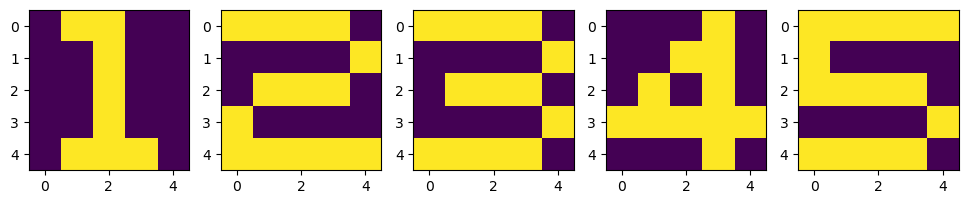

In [148]:
# 데이터 준비
X = np.zeros((5, 5, 5))

X[:, :, 0] = [[0,1,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0]]
X[:, :, 1] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,1,1]]
X[:, :, 2] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]
X[:, :, 3] = [[0,0,0,1,0], [0,0,1,1,0], [0,1,0,1,0], [1,1,1,1,1], [0,0,0,1,0]]
X[:, :, 4] = [[1,1,1,1,1], [1,0,0,0,0], [1,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]

# 정답지
D = np.array([[[1,0,0,0,0]], [[0,1,0,0,0]], [[0,0,1,0,0]], [[0,0,0,1,0]], [[0,0,0,0,1]]])

plt.figure(figsize=(12, 4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X[:, :, n])
plt.show()

In [149]:
# relu : 음수는 모두 0으로 이외의 값은 해당 값으로 반환해줌
def ReLU(x):
    # np.maximum : 여러 array 사이에서 각 위치의 최대값 반환
    return np.maximum(0, x)


# 순방향 계산
def calc_output_relu(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    v = np.matmul(W4, y3)
    y = softmax(v)

    return y, v1, v2, v3, y1, y2, y3

In [150]:
# 역전파를 이용한 델타 계산
def backprop_ReLU(d, y, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e

    e3 = np.matmul(W4.T, delta)
    delta3 = (v3 > 0)*e3

    e2 = np.matmul(W3.T, delta3)
    delta2 = (v2 > 0)*e2

    e1 = np.matmul(W2.T, delta2)
    delta1 = (v1 > 0)*e1

    return delta, delta1, delta2, delta3

In [151]:
# 델타를 이용한 가중치 업데이트 계산
def calc_Ws(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4):
    dW4 = alpha*delta*y3.T
    W4 = W4 + dW4

    dW3 = alpha*delta3*y2.T
    W3 = W3 + dW3

    dW2 = alpha*delta2*y1.T
    W2 = W2 + dW2

    dW1 = alpha*delta1*x.T
    W1 = W1 + dW1

    return W1, W2, W3, W4

In [152]:
# 가중치 업데이트
def DeepReLU(W1, W2, W3, W4, X, D, alpha):
    for k in range(5):
        x = np.reshape(X[:, :, k], (25, 1))
        d =D[k, :].T
        
        y, v1, v2, v3, y1, y2, y3 = calc_output_relu(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backprop_ReLU(d, y, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calc_Ws(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)

        return W1, W2, W3, W4

In [159]:
# 학습
W1 = 2*np.random.random((20, 25)) -1
W2 = 2*np.random.random((20, 20)) - 1
W3 = 2*np.random.random((20, 20)) - 1
W4 = 2*np.random.random((5, 20)) - 1

alpha = 0.001
for epoch in tqdm_notebook(range(10000)):
    W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

C:\Users\nabi4\AppData\Local\Temp\ipykernel_20832\3540035195.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(10000)):


  0%|          | 0/10000 [00:00<?, ?it/s]

In [160]:
# 검증
def verify_algorithm(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)

    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)

    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)

    v = np.matmul(W4, y3)
    y = softmax(v)

    return y

In [161]:
# 결과
N= 5
for k in range(N):
    x = np.reshape(X[:, :, k], (25, 1))
    y = verify_algorithm(x, W1, W2, W3, W4)
    print("Y = {} : ".format(k+1)) # 실제값
    print(np.argmax(y, axis=0)+1)  # 예측값 
    print(y)
    print('--------------------')

Y = 1 : 
[1]
[[9.99917399e-01]
 [1.36702616e-05]
 [1.11278793e-18]
 [3.93354909e-13]
 [6.89303246e-05]]
--------------------
Y = 2 : 
[1]
[[9.52388094e-01]
 [6.02660799e-05]
 [2.72296984e-13]
 [1.91430878e-11]
 [4.75516398e-02]]
--------------------
Y = 3 : 
[1]
[[9.45904389e-01]
 [3.51767938e-05]
 [1.89795236e-20]
 [9.92162623e-17]
 [5.40604344e-02]]
--------------------
Y = 4 : 
[2]
[[3.54539757e-01]
 [3.77680913e-01]
 [1.09189947e-14]
 [1.40416790e-17]
 [2.67779331e-01]]
--------------------
Y = 5 : 
[1]
[[7.33330680e-01]
 [3.11763484e-07]
 [4.61956562e-32]
 [1.28548912e-27]
 [2.66669008e-01]]
--------------------


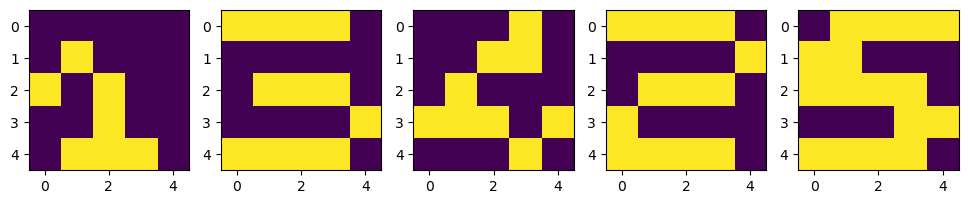

In [163]:
# 테스트
X_test = np.zeros((5, 5, 5))

X_test[:, :, 0] = [[0,0,0,0,0], [0,1,0,0,0], [1,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0]]
X_test[:, :, 1] = [[1,1,1,1,0], [0,0,0,0,0], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]
X_test[:, :, 2] = [[0,0,0,1,0], [0,0,1,1,0], [0,1,0,0,0], [1,1,1,0,1], [0,0,0,1,0]]
X_test[:, :, 3] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,1,0]]
X_test[:, :, 4] = [[0,1,1,1,1], [1,1,0,0,0], [1,1,1,1,0], [0,0,0,1,1], [1,1,1,1,0]]

plt.figure(figsize=(12, 4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X_test[:, :, n])
plt.show()

In [164]:
# 예측
learning_result = [0,0,0,0,0]

for k in range(N):
    x = np.reshape(X_test[:, :, k], (25, 1))
    y = verify_algorithm(x, W1, W2, W3, W4)

    learning_result[k] = np.argmax(y, axis = 0) + 1
    
    print("Y = {} : ".format(k+1))
    print(np.argmax(y, axis=0)+1)
    print(y)
    print('--------------------')

Y = 1 : 
[1]
[[9.97774371e-01]
 [1.76258476e-04]
 [1.95665140e-15]
 [2.95264480e-10]
 [2.04937031e-03]]
--------------------
Y = 2 : 
[1]
[[9.88242509e-01]
 [4.28650305e-06]
 [4.48220624e-25]
 [1.10262091e-20]
 [1.17532041e-02]]
--------------------
Y = 3 : 
[5]
[[5.78947989e-04]
 [6.59162681e-02]
 [1.07897405e-18]
 [3.29743423e-25]
 [9.33504784e-01]]
--------------------
Y = 4 : 
[1]
[[9.66437280e-01]
 [7.31833265e-05]
 [1.13585722e-18]
 [3.69326947e-15]
 [3.34895370e-02]]
--------------------
Y = 5 : 
[1]
[[9.92794296e-01]
 [4.03110286e-08]
 [4.13176511e-34]
 [3.12283844e-28]
 [7.20566349e-03]]
--------------------


In [165]:
learning_result

[array([1], dtype=int64),
 array([1], dtype=int64),
 array([5], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64)]

In [166]:
learning_result[0][0]

1

In [169]:
learning_result[2][0]

5

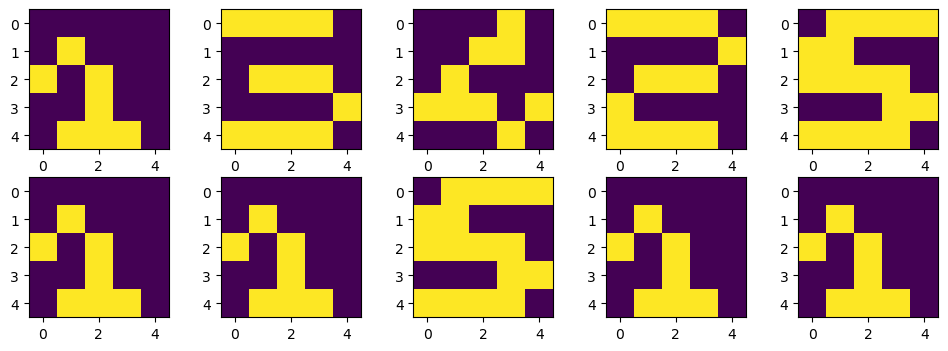

In [170]:
plt.figure(figsize=(12, 4))
for k in range(5):
    plt.subplot(2, 5, k+1)
    plt.imshow(X_test[:, :, k]) # 원본 데이터

    plt.subplot(2, 5, k+6)
    plt.imshow(X_test[:, :, learning_result[k][0] - 1]) # 예측 데이터
plt.show()

모델에 융통성을 기르게 해보자.

In [179]:
y = np.array([0.1, 0.2, 0.5, 0.7, 0.9, 0.6, 1, 2, 3])
y.size, y.size*(1 - 0.8), round(y.size*(1 - 0.8))

(9, 1.7999999999999996, 2)

In [180]:
num = round(y.size*(1 - 0.8))
np.random.choice(y.size, num, replace = True)

array([3, 8])

In [171]:
# dropout 함수
def Dropout(y, ratio):
    ym = np.zeros_like(y) 

    num = round(y.size * (1 - ratio)) 
    # y.size까지의 수 중 num 개수만큼 랜덤으로 추출
    idx = np.random.choice(y.size, num, replace = True)
    ym[idx] = 1.0 / (1.0 - ratio)

    return ym

# dropout 적용시킨 순방향 출력 계산
def calc_output_dropout(W1, W2, W3, W4, x):  
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    y1 = y1 * Dropout(y1, 0.2)

    v2 = np.matmul(W2, y1)
    y2 = sigmoid(v2)
    y1 = y2 * Dropout(y2, 0.2)

    v3 = np.matmul(W3, y2)
    y3 = sigmoid(v3)
    y3 = y3 * Dropout(y3, 0.2)

    v = np.matmul(W4, y3)
    y = softmax(v)

    return y, y1, y2, y3, v1, v2, v3

In [174]:
# 역전파를 이용한 델타 계산
def backprop_dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e

    e3 = np.matmul(W4.T, delta)
    delta3 = y3*(1 - y3)*e3

    e2 = np.matmul(W3.T, delta3)
    delta2 = y2*(1 - y2)*e2

    e1 = np.matmul(W2.T, delta2)
    delta1 = y1*(1 - y1)*e1

    return delta, delta1, delta2, delta3


# 가중치 업데이트
def Deepdropout(W1, W2, W3, W4, X, D):
    for k in range(5):
        x = np.reshape(X[:, :, k], (25, 1))
        d =D[k, :].T
        
        y, y1, y2, y3, v1, v2, v3 = calc_output_dropout(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backprop_dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calc_Ws(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)

        return W1, W2, W3, W4

In [175]:
# 학습
W1 = 2*np.random.random((20, 25)) -1
W2 = 2*np.random.random((20, 20)) - 1
W3 = 2*np.random.random((20, 20)) - 1
W4 = 2*np.random.random((5, 20)) - 1

for epoch in tqdm_notebook(range(10000)):
    W1, W2, W3, W4 = Deepdropout(W1, W2, W3, W4, X, D)

C:\Users\nabi4\AppData\Local\Temp\ipykernel_20832\1640940980.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(10000)):


  0%|          | 0/10000 [00:00<?, ?it/s]

In [176]:
# 테스트 데이터 다시 예측
learning_result = [0,0,0,0,0]

for k in range(N):
    x = np.reshape(X_test[:, :, k], (25, 1))
    y = verify_algorithm(x, W1, W2, W3, W4)

    learning_result[k] = np.argmax(y, axis = 0) + 1
    
    print("Y = {} : ".format(k+1))
    print(np.argmax(y, axis=0)+1)
    print(y)
    print('--------------------')

Y = 1 : 
[1]
[[9.99999971e-01]
 [7.54806239e-09]
 [2.00070553e-10]
 [1.82389165e-08]
 [2.72443223e-09]]
--------------------
Y = 2 : 
[1]
[[1.00000000e+00]
 [1.39160598e-15]
 [3.24701400e-30]
 [5.30496823e-21]
 [2.94890800e-17]]
--------------------
Y = 3 : 
[1]
[[1.00000000e+00]
 [5.29248116e-12]
 [1.26682361e-20]
 [2.01812776e-12]
 [2.52723875e-15]]
--------------------
Y = 4 : 
[1]
[[1.00000000e+00]
 [9.56157036e-18]
 [1.64030362e-33]
 [4.49123330e-24]
 [1.48912468e-18]]
--------------------
Y = 5 : 
[1]
[[1.00000000e+00]
 [2.47647031e-13]
 [1.29352343e-22]
 [1.02505529e-16]
 [1.31660952e-12]]
--------------------


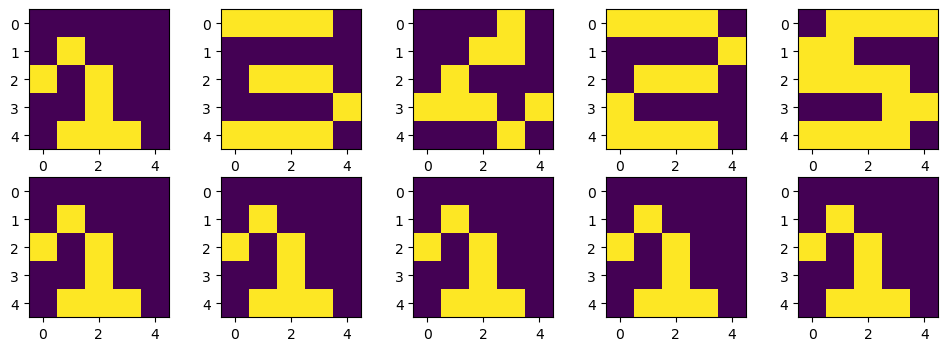

In [177]:
plt.figure(figsize=(12, 4))
for k in range(5):
    plt.subplot(2, 5, k+1)
    plt.imshow(X_test[:, :, k]) # 원본 데이터

    plt.subplot(2, 5, k+6)
    plt.imshow(X_test[:, :, learning_result[k][0] - 1]) # 예측 데이터
plt.show()

예측한 결과가 거의 안 맞아서 너무 아쉽다 ㅠ